# Linear Regression
#### Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.
#### This form of analysis estimates the coefficients of the linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. 
#### There are simple linear regression calculators that use a “least squares” method to discover the best-fit line for a set of paired data. You then estimate the value of X (dependent variable) from Y (independent variable).\


#### 1->Finding the best fit line is called Linear Regression.
#### 2->Minimum distance from the straight line is called best fit line.
#### 3->Best fit line is the one where sum of the squares of the length of the errors is minimum(Least Square Error)
#### 4->Least Square Erroe=Predicted Value- Actual Value
### Y=mX + c
#### m=Slope, coef , Variance
#### c=Intercept , Bias


#### Age-> 10 , 15, 17 , 20 , 24
#### Height-> 4.1 , 4.2 , 5.6 , 5.6 , 5.8
### Y=Height
### X=Age
### m=?
### c=?
### Least Square Error=?
### MSE= ?


## Mean Square Error=(SUM(Actual Valye - Predicted Value)**2) /N
#### N= no of observations / data point

## So our main goal is to minimize the MSE . But How ?
#### So we have to chhose the value of m and c in such a way that our MSE value will be minimum.
#### Here the Gradient Descent Came into picture

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
bos.columns = names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos["Price"] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
x=bos.drop(columns='Price',axis=1)

In [7]:
x.head(0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


In [8]:
y=bos['Price']

In [9]:
y.head(0)

Series([], Name: Price, dtype: float64)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
LR=LinearRegression(normalize=True)

In [14]:
LR.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [15]:
y_predict=LR.predict(x_test)

In [16]:
y_predict.shape

(152,)

In [17]:
y_test.shape

(152,)

In [18]:
LR.coef_

array([-9.04233399e-02,  4.36883149e-02,  3.02520452e-02,  1.16653584e+00,
       -1.67437012e+01,  4.41077261e+00, -9.23417202e-03, -1.26253929e+00,
        2.62898485e-01, -1.50664018e-02, -1.01686825e+00,  1.00080949e-02,
       -3.49750607e-01])

In [19]:
LR.intercept_

31.950485158611446

# Residual Sum of Squares
#### RSS = SUM( Actual - Predicted)**2

# Total Sum of Squares
#### TSS = SUM( Y_Actual -Y_ Average)**2

# R Square and Adjusted R Square

#### R Square= 1-(RSS / TSS)

#### Adjusted R_Square = 1-((1-R**2)(n-1))/(n-p-1)
#### p->no of regressor / represents the number of independent variables
#### n= sample size

In [91]:
import statsmodels.api as sm


In [96]:
model=sm.OLS(x,y)
result=model.fit()

In [98]:
print(result.summary())
print(result.rsquared_adj)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              27.88
Date:                Fri, 27 Nov 2020   Prob (F-statistic):                    0.000507
Time:                        08:51:24   Log-Likelihood:                         -25.390
No. Observations:                  10   AIC:                                      52.78
Df Residuals:                       9   BIC:                                      53.08
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [20]:
from sklearn.metrics import r2_score

In [21]:
print(r2_score(y_test,y_predict))

0.600338024211021


# Overfitting 
#### Very well on training data but poor in testing data .
#### Low training error and high test error . 

# How to prevent Overfitting ?
#### Ans->
#### 1->Regularization
#### 2->Cross Validation
#### 3->Drop out

# Regularization\
#### 1-> Add penality to objective function .Here objective function for regression is Least Square Error.
#### 2-> Forces optimizer (Linear Regressor) to keep simple co-efficient.
#### 3-> Heigher or more complex the co-efficient heigher the penality and the model will serve to minimize the penality.
### After regularization we may get low variance and high bias .


### There are three Regularization model is used to prevent overfitting.
#### 1-> Lass Regression
#### 2-> Ridge Regression
#### 3->ElasticNet 

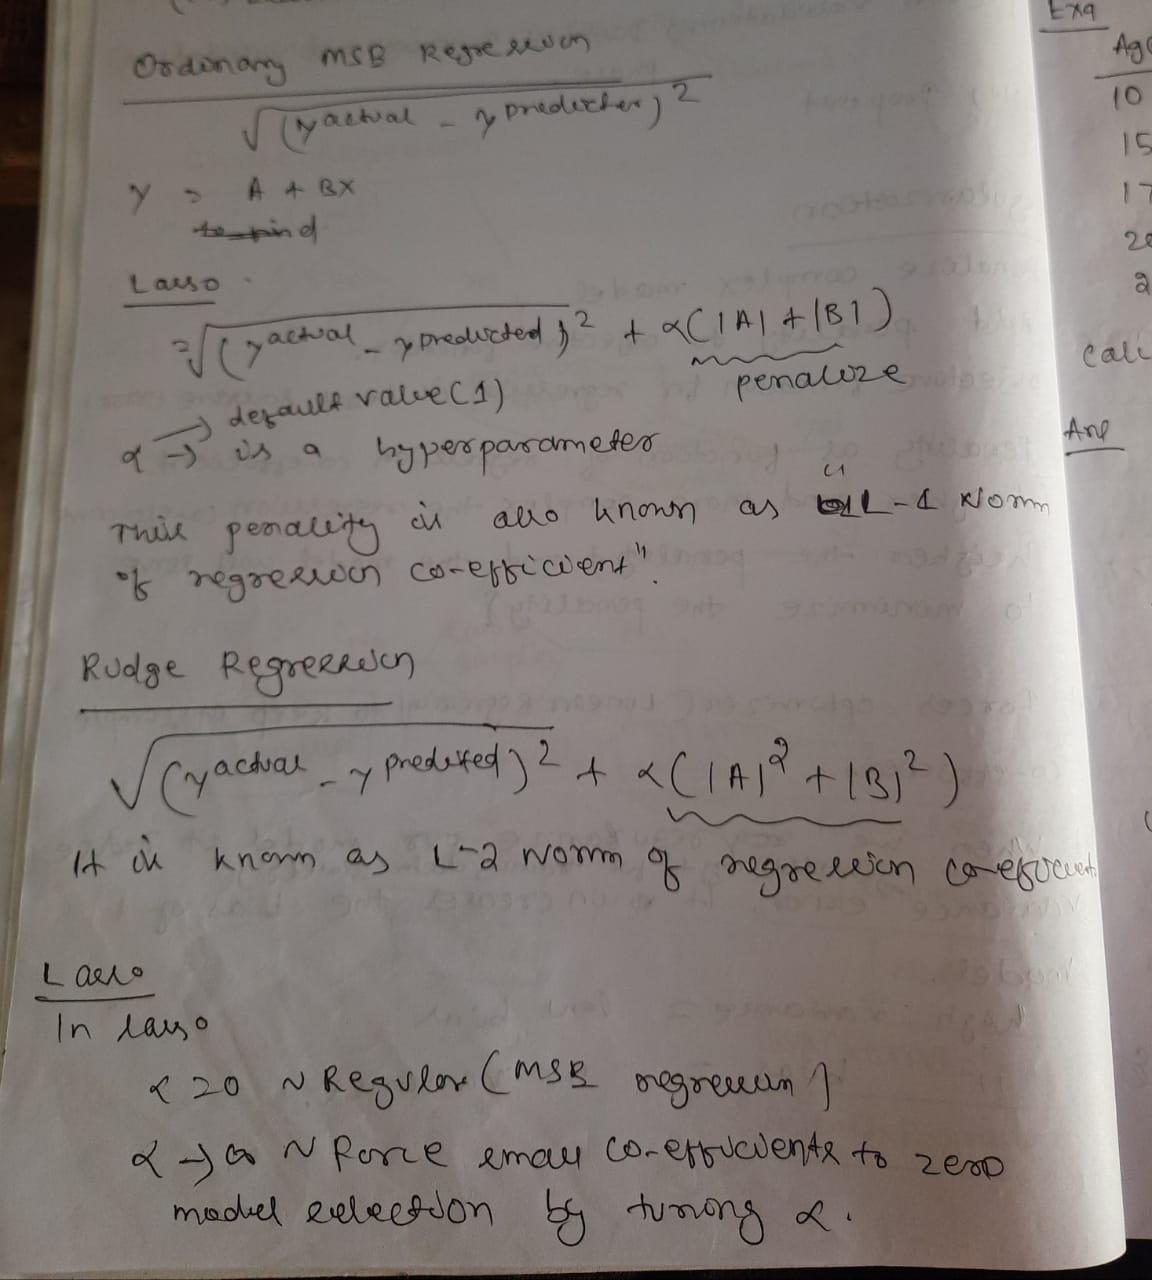

In [22]:
from PIL import Image 
pic = Image.open("lasso.jpeg") 
pic

# Difference between Ridge and Lasso
Ridge regression shrinks the coefficients for those predictors which contribute very less in the model but have huge weights, very close to zero. But it never makes them exactly zero. Thus, the final model will still contain all those predictors, though with less weights. This doesn’t help in interpreting the model very well. This is where Lasso regression differs with Ridge regression. In Lasso, the L1 penalty does reduce some coefficients exactly to zero when we use a sufficiently large tuning parameter λ. So, in addition to regularizing, lasso also performs feature selection.


# Why use Regularization?
Regularization helps to reduce the variance of the model, without a substantial increase in the bias. If there is variance in the model that means that the model won’t fit well for dataset different that training data. The tuning parameter λ controls this bias and variance tradeoff. When the value of λ is increased up to a certain limit, it reduces the variance without losing any important properties in the data. But after a certain limit, the model will start losing some important properties which will increase the bias in the data. Thus, the selection of good value of λ is the key.
The value of λ is selected using cross-validation methods. A set of λ is selected and cross-validation error is calculated for each value of λ and that value of λ is selected for which the cross-validation error is minimum.


# **When should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?**

 it is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

In [23]:
from sklearn.linear_model  import Ridge

In [24]:
from sklearn.linear_model  import Lasso

In [25]:
from sklearn.linear_model  import ElasticNet

In [26]:
ridge=Ridge()

In [27]:
ridge.fit(x_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [28]:
y_pred=ridge.predict(x_test)

In [29]:
print((r2_score(y_test,y_predict)))

0.600338024211021


In [30]:
lasso=Lasso()

In [31]:
lasso.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
y_pred=lasso.predict(x_test)

In [33]:
print(r2_score(y_test,y_pred))

0.5463235614617886


In [34]:
ela=ElasticNet()

In [35]:
ela.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [36]:
y_pred=ela.predict(x_test)

In [37]:
print(r2_score(y_test,y_pred))

0.5540838435262971


In [38]:
ela=ElasticNet(l1_ratio=1)

In [39]:
ela.fit(x_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
y_pred=ela.predict(x_test)

In [41]:
print(r2_score(y_test,y_pred))

0.5463235614617886


In [42]:
ela=ElasticNet(l1_ratio=0)

In [43]:
ela.fit(x_train,y_train)

C:\Users\debad\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4526.7666050715625, tolerance: 2.925901957627119
  positive)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [44]:
y_pred=ela.predict(x_test)

In [45]:
print(r2_score(y_test,y_pred))

0.5618385347514355


l1_ratio − float

This is called the ElasticNet mixing parameter. Its range is 0 < = l1_ratio < = 1. If l1_ratio = 1, the penalty would be L1 penalty. If l1_ratio = 0, the penalty would be an L2 penalty. If the value of l1 ratio is between 0 and 1, the penalty would be the combination of L1 and L2.

max_iter − int, optional

As name suggest, it represents the maximum number of iterations taken for conjugate gradient solvers.

warm_start − bool, optional, default = false

With this parameter set to True, we can reuse the solution of the previous call to fit as initialisation. If we choose default i.e. false, it will erase the previous solution.

In [46]:
ela.n_iter_

1000

In [47]:
ela.coef_

array([-0.08694555,  0.06334128, -0.04838693,  0.1333816 , -0.04017855,
        1.0085691 ,  0.01428355, -0.71396261,  0.30044665, -0.01878997,
       -0.83116689,  0.00873052, -0.60062024])

In [48]:
ela.intercept_

42.45002275676761

# Grid Search

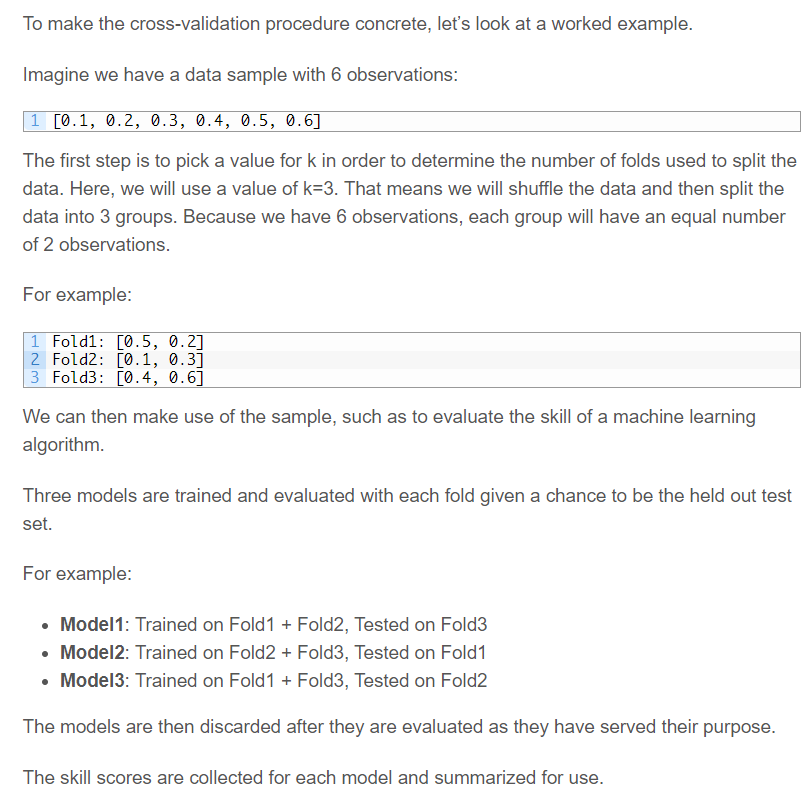

In [49]:
pic = Image.open("CV.PNG") 
pic

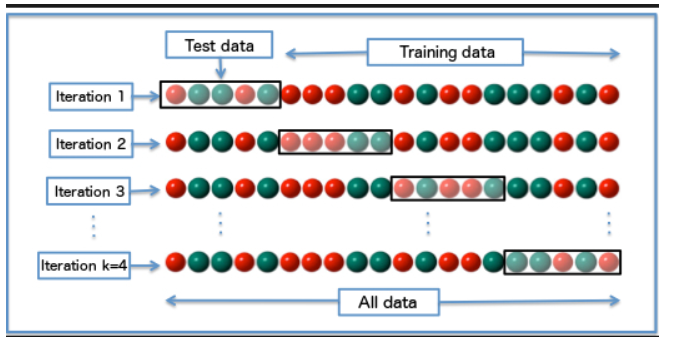

In [50]:
pic = Image.open("CV_1.PNG") 
pic

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
parameters={'alpha': [0.2,0.4,0.6,0.8,0.9]}

In [53]:
grid=GridSearchCV(Lasso(),parameters,cv=10)

In [54]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [55]:
grid.best_params_

{'alpha': 0.4}

In [56]:
lasso=Lasso(alpha=0.2)

In [57]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [58]:
y_pred=lasso.predict(x_test)

In [59]:
print(r2_score(y_test,y_pred))

0.5776607492378854


In [60]:
grid=GridSearchCV(ElasticNet(),parameters,cv=10)

In [61]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.2, 0.4, 0.6, 0.8, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
grid.best_params_

{'alpha': 0.2}

In [63]:
ela=ElasticNet(alpha=0.2)

In [64]:
ela.fit(x_train,y_train)

ElasticNet(alpha=0.2, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
y_pred=ela.predict(x_test)

In [66]:
print(r2_score(y_test,y_pred))

0.5842313906281515


In [67]:
from sklearn.linear_model  import RidgeCV,LassoCV,ElasticNetCV

In [68]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [69]:
alpha = lasscv.alpha_
alpha

0.001261720133442897

In [70]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001261720133442897, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
lasso_reg.score(x_test, y_test)

0.6001203021924228

In [72]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([8.42614097, 4.90011879, 4.60335507, 9.62480701, 7.96241945,
       2.75956428, 8.88409621, 4.58504365, 6.11590359, 6.36009554,
       2.094526  , 9.30455369, 9.26273867, 7.93178872, 9.27170966,
       6.54272952, 5.41151711, 8.34556516, 2.53489401, 4.12532321,
       2.65830003, 0.77194247, 1.44175124, 1.83705583, 6.85836171,
       1.87343879, 4.2890423 , 7.83968166, 5.33423336, 1.3098326 ,
       4.26634307, 8.65763061, 6.77424892, 5.2702053 , 1.76426151,
       9.59382853, 5.56998004, 8.11745596, 8.53716904, 5.80925959,
       1.85464089, 8.96547035, 6.77329318, 5.58992294, 2.34809301,
       4.68652364, 4.42963865, 0.29123964, 6.87636121, 0.35530404]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [73]:
ridgecv.alpha_

0.29123964399388136

In [74]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.29123964399388136, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [75]:
ridge_model.score(x_test, y_test)

0.5995608144350315

we got the same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.

In [76]:
elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(x_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [77]:
elasticCV.alpha_

1.72874642344154

In [78]:
elasticCV.l1_ratio

0.5

In [79]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=1.72874642344154, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [80]:
elasticnet_reg.score(x_test, y_test)

0.5251961053582892

#  Polynomial Regression

For understanding Polynomial Regression, let's first understand a polynomial.
Merriam-webster defines a polynomial as:
"_A mathematical expression of one or more algebraic terms each of which consists of a constant multiplied by one or more variables raised to a non-negative integral power (such as a + bx + cx^2)"._
Simply said, poly means many. So, a polynomial is an aggregation of many monomials(or Variables).
A simple polynomial equation can be written as:
$$y = {a+bx + cx^2+...+nx^n+...}$$

So, Polynomial Regression can be defined as a mechanism to predict a _dependent variable_ based on the polynomial relationship with the _independent variable_.

 In the equation, _$$y= {a+bx + cx^2+...+nx^n+...}$$_ the maximum power of 'x' is called the degree of the polynomial equation.
 For example, if the degree is 1, the equation becomes $$y={a+bx}$$ which is a simple linear equation.
              if the degree is 2, the equation becomes $$y = {a+bx + cx^2}$$ which is a quadratic equation and so on.

In [81]:
#importing the dataset
dataset= pd.read_csv('Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head() 

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [82]:
x=dataset.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [83]:
y=dataset.iloc[:,2].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [84]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

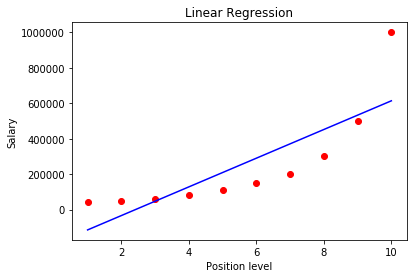

In [85]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [86]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
X_poly = poly_reg.fit_transform(x)
print(X_poly)
poly_reg.fit(X_poly, y)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [87]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

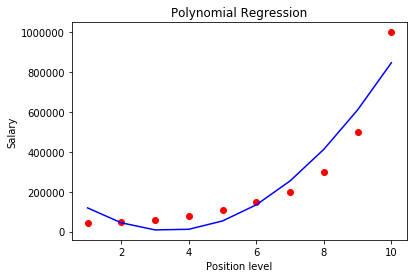

In [88]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [89]:
poly_reg1 = PolynomialFeatures(degree = 4)
X_poly1 = poly_reg1.fit_transform(x)
poly_reg1.fit(X_poly, y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly1, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

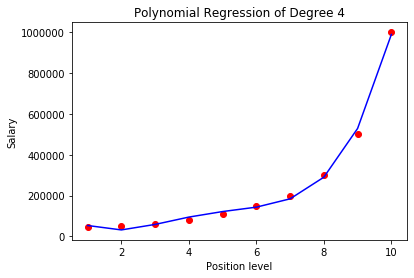

In [90]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression of Degree 4')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()